## Importing Dependencies

In [3]:
!pip3 install pandas numpy matplotlib seaborn scikit-learn plotly


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 30.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 35.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 26.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 28.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 25.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 28.6 MB/s e

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

Matplotlib is building the font cache; this may take a moment.


## Data Collection

In [8]:
# Load the dataset
customer_dataset = pd.read_csv('Restaurant_Customers.csv')

## Exploratory Data Analysis (EDA)

In [9]:
customer_dataset.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

       Dining style    Cuisine preferences  
0         Fast Food               American  
1    Casual           Italian               
2   Fine Dining       Mexican               
3   Fast Food         Indian                
4    Casual           Chinese

In [10]:
customer_dataset.tail()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

    Dining style Cuisine preferences  
195  Fine Dining             Mexican  
196       Casual                Thai  
197    Fast Food             Italian  
198  Fine Dining              Korean  
199       Casual            American

In [11]:
customer_dataset.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [12]:
customer_dataset.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
Dining style              object
Cuisine preferences       object
dtype: object

In [13]:
customer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Dining style            200 non-null    object
 6   Cuisine preferences     199 non-null    object
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


## Data Visualization

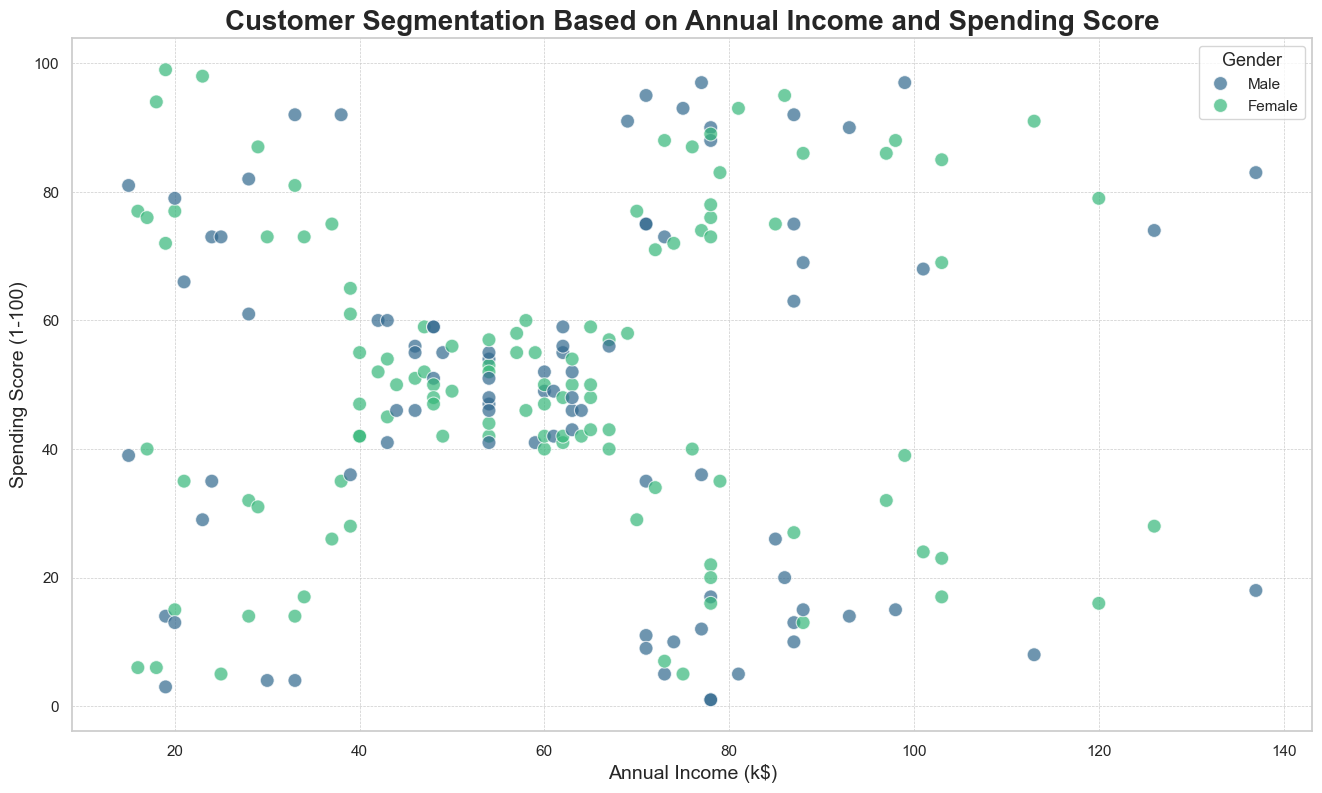

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(16, 9))

scatter = sns.scatterplot(
    x=customer_dataset['Annual Income (k$)'],
    y=customer_dataset['Spending Score (1-100)'],
    hue=customer_dataset['Gender'],
    palette='viridis',
    s=100,
    edgecolor='w',
    alpha=0.7
)

plt.title('Customer Segmentation Based on Annual Income and Spending Score', fontsize=20, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend(title='Gender', title_fontsize='13', fontsize='11', loc='upper right')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


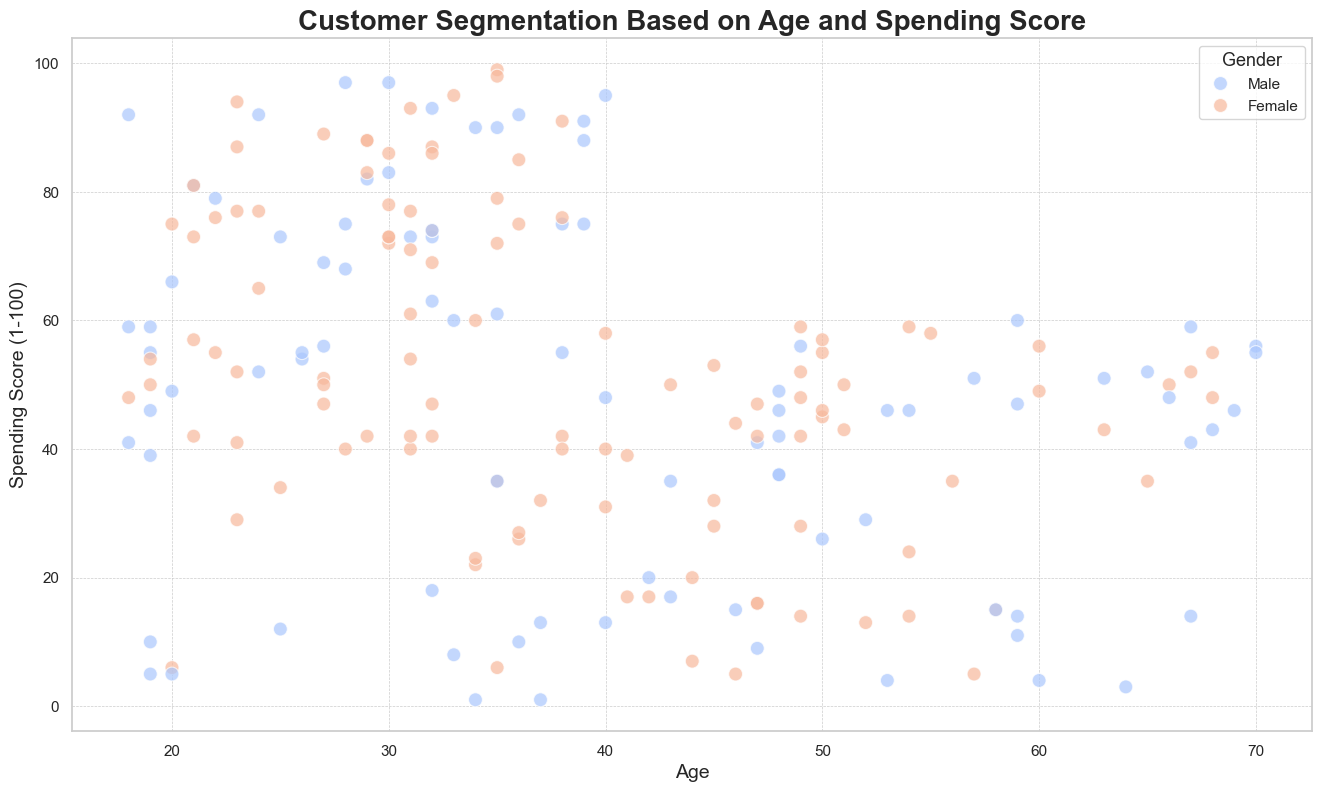

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 9))
scatter = sns.scatterplot(
    x=customer_dataset['Age'],
    y=customer_dataset['Spending Score (1-100)'],
    hue=customer_dataset['Gender'],
    palette='coolwarm',
    s=100,
    edgecolor='w',
    alpha=0.7
)
plt.title('Customer Segmentation Based on Age and Spending Score', fontsize=20, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend(title='Gender', title_fontsize='13', fontsize='11', loc='upper right')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


/var/folders/rz/qy3l3x257xb8z4hjptz93m9r0000gn/T/ipykernel_69651/3373960236.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(


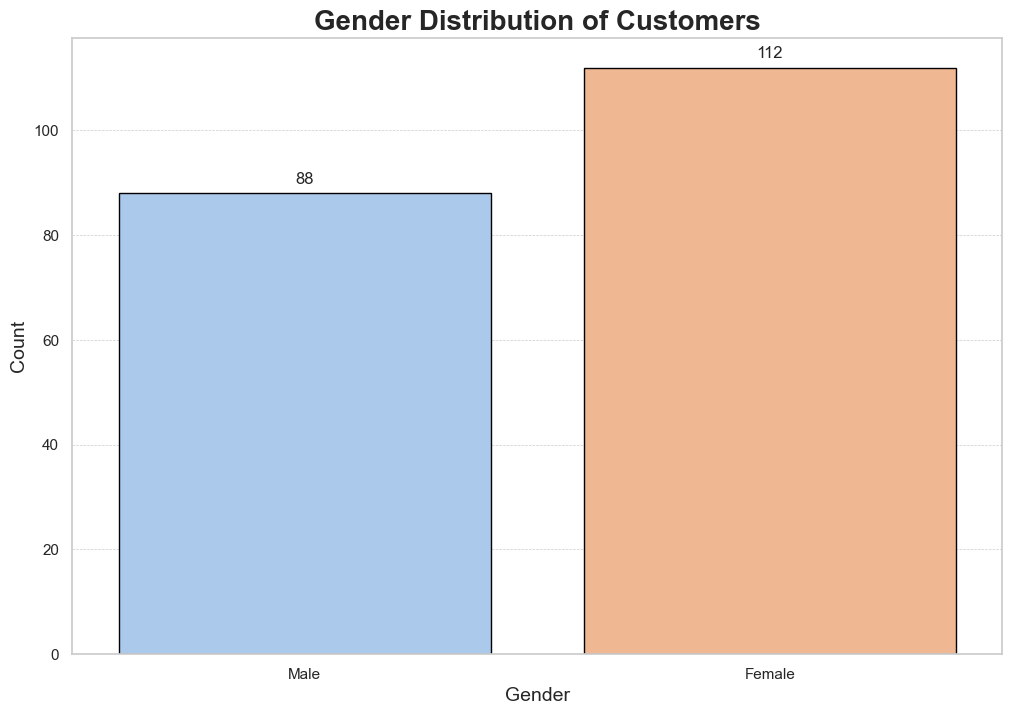

In [20]:

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
count_plot = sns.countplot(
    x='Gender',
    data=customer_dataset,
    palette='pastel',
    edgecolor='black'
)
plt.title('Gender Distribution of Customers', fontsize=20, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), '.0f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 10), 
                        textcoords='offset points',
                        fontsize=12)

plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

/var/folders/rz/qy3l3x257xb8z4hjptz93m9r0000gn/T/ipykernel_69651/3974664502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(


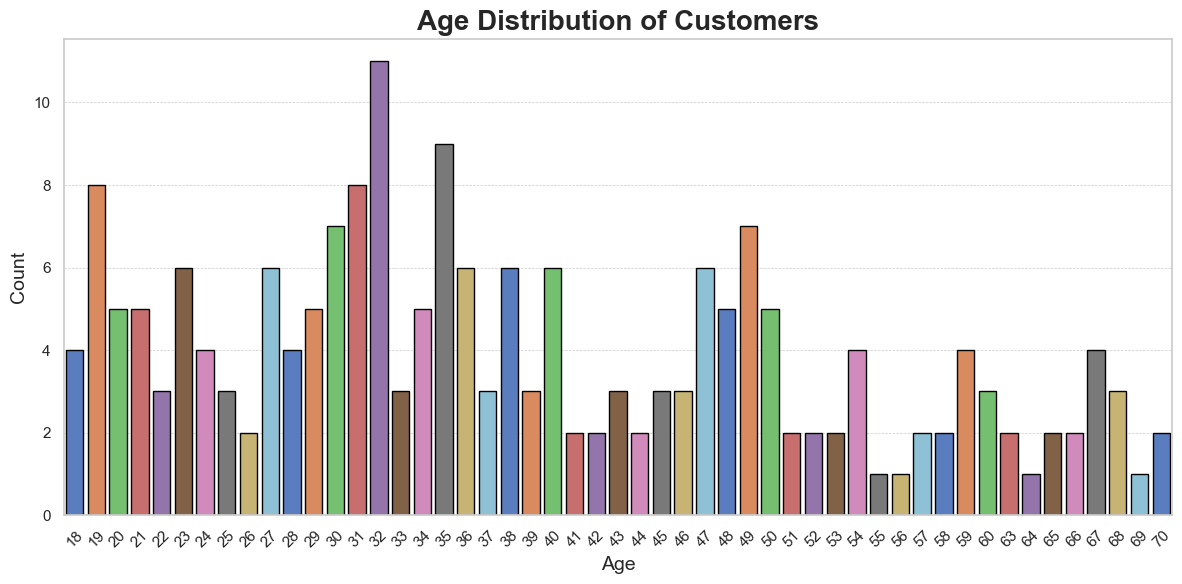

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
count_plot = sns.countplot(
    x='Age',
    data=customer_dataset,
    palette='muted',
    edgecolor='black'
)
plt.title('Age Distribution of Customers', fontsize=20, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


/var/folders/rz/qy3l3x257xb8z4hjptz93m9r0000gn/T/ipykernel_69651/1216818637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(


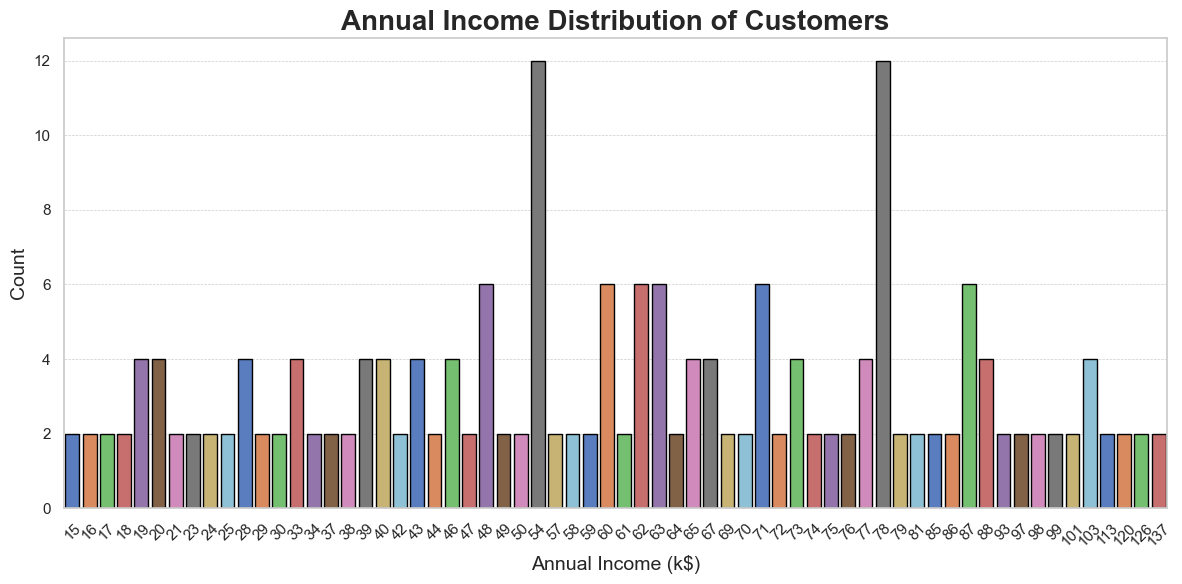

In [27]:
plt.figure(figsize=(12, 6))
count_plot = sns.countplot(
    x='Annual Income (k$)',
    data=customer_dataset,
    palette='muted',
    edgecolor='black'
)
plt.title('Annual Income Distribution of Customers', fontsize=20, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


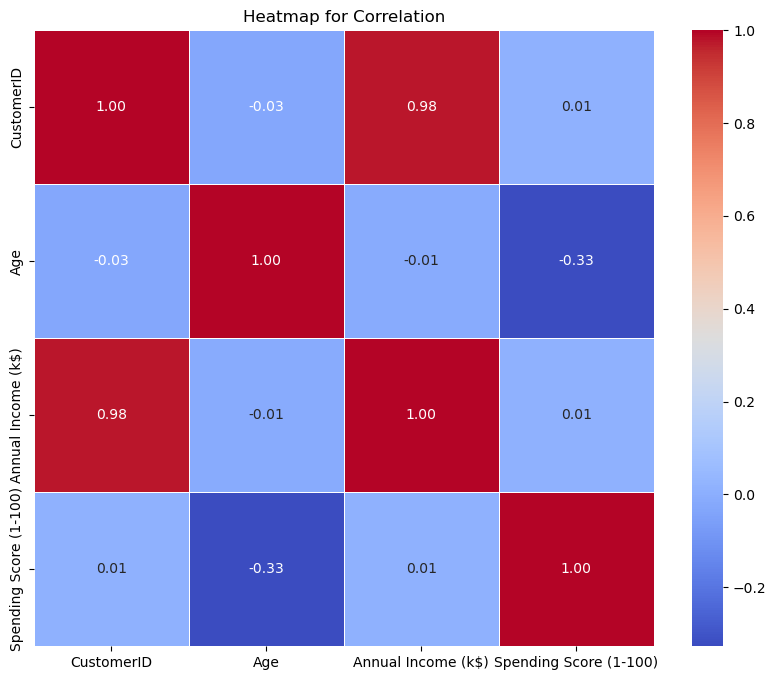

In [15]:
# Heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(customer_dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap for Correlation')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because

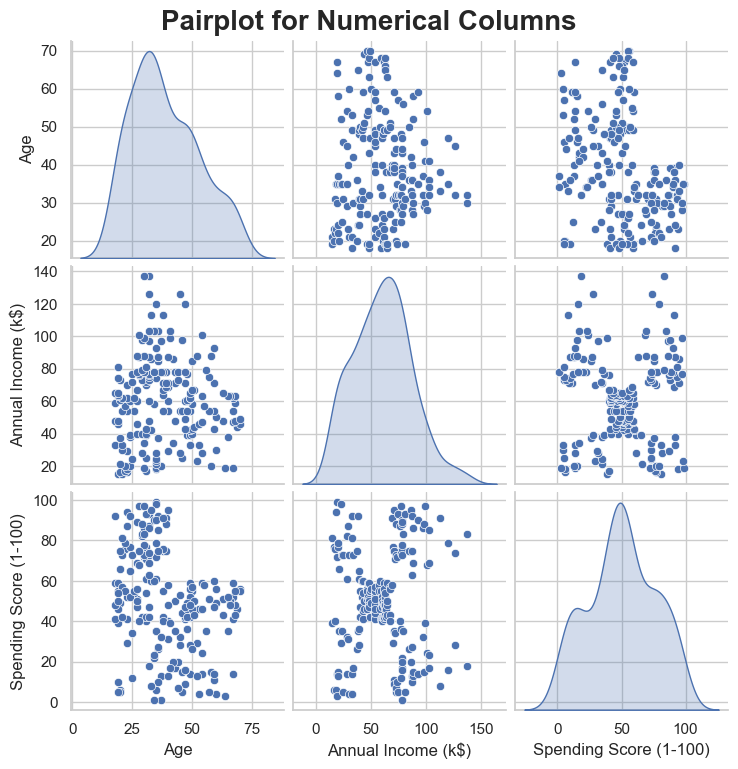

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Select only the numeric columns
numeric_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Pairplot for selected numerical columns
pairplot = sns.pairplot(customer_dataset[numeric_columns], diag_kind='kde', palette='muted')

# Add title to the pairplot
pairplot.fig.suptitle('Pairplot for Numerical Columns', fontsize=20, fontweight='bold', y=1.02)

# Show plot
plt.show()


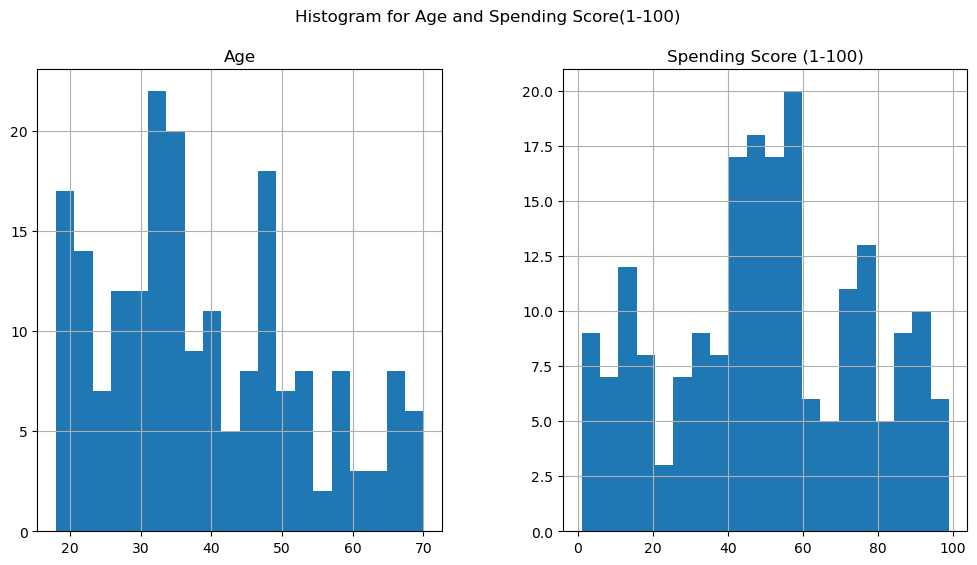

In [17]:
# Histogram for Age and Spending Score
customer_dataset[['Age', 'Spending Score (1-100)']].hist(bins=20, figsize=(12, 6))
plt.suptitle('Histogram for Age and Spending Score(1-100)')
plt.show()

## Finding and ploting the Elbow graph for K-Means clustering

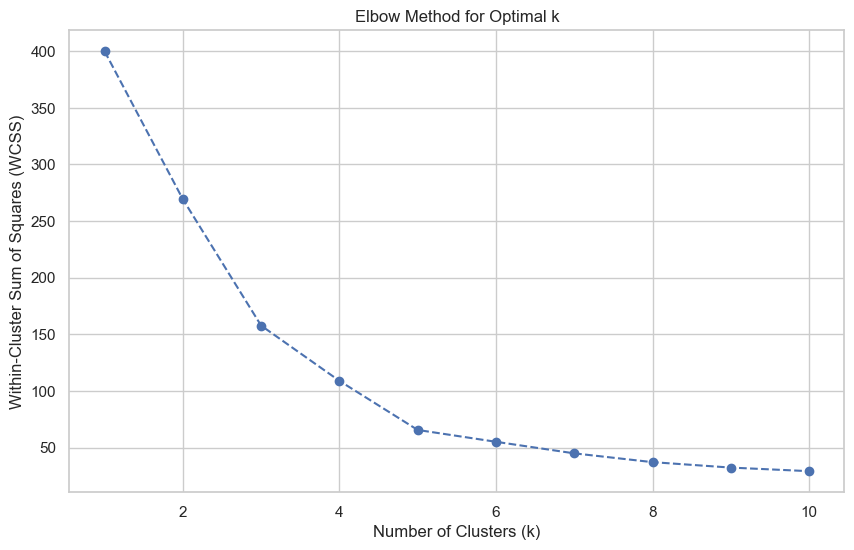

Cluster Centers:
   Annual Income (k$)  Spending Score (1-100)
0           77.785714               73.285714
1           62.583333               47.291667
2           79.739130               13.391304
3           45.891892               52.378378
4           24.583333                9.583333
5           82.388889               90.444444
6           24.950000               81.000000
7          109.700000               22.000000
8          114.714286               78.428571
9           28.181818               33.272727


In [30]:
X = customer_dataset[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#WCSS : within Clusters Sum of Squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

optimal_k = 5
customer_dataset['cluster'] = kmeans.labels_
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)  # Ensure columns match X
print("Cluster Centers:")
print(cluster_centers)



## Training the K-Means Clustering mode

In [20]:
kmeans = KMeans(n_clusters =5, init = 'k-means++', random_state =0)
Y = kmeans.fit_predict(X)
print(Y)


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


## Cluster using K-Means with the optimal k and Plotting the clustered data

In [21]:
k = 5  # Choose the optimal k from the elbow graph
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
customer_dataset['cluster'] = kmeans.fit_predict(X_scaled)


# Get cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)

# Plot clustered data
fig = px.scatter(customer_dataset, x='Annual Income (k$)', y='Spending Score (1-100)', color='cluster', title='Clustered Data')
fig.show()



# Plot the cluster centers
fig.add_trace(px.scatter(x=cluster_centers['Annual Income (k$)'], y=cluster_centers['Spending Score (1-100)'],
                         color=['Cluster Center'] * k, size=[10] * k).data[0])

fig.show()